In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


In [3]:
# Before any assessment i am creating a copy of dataset to operate.
df_clean=df.copy()

### Assessing

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

As we can see from above information that there are many columns which are empty, or may having the Null Value.

In [5]:
len(df_clean.status)

12043

In [6]:
df_clean.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

As we can see from above data that there only two category for the staus having total value of 12043.

In [7]:
df_clean.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [8]:
df_clean.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [9]:
df_clean.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [10]:
# we to convert this column from object to datetime to operate easily.
df_clean.extraction.head(2)

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
Name: extraction, dtype: object

In [11]:
df_clean['extraction']=pd.to_datetime(df_clean['extraction'])

In [12]:
df_clean.extraction.dtype

datetime64[ns, UTC]

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   bpay_biller_code   885 non-null    object             
 3   account            12043 non-null  object             
 4   currency           12043 non-null  object             
 5   long_lat           12043 non-null  object             
 6   txn_description    12043 non-null  object             
 7   merchant_id        7717 non-null   object             
 8   merchant_code      883 non-null    float64            
 9   first_name         12043 non-null  object             
 10  balance            12043 non-null  float64            
 11  date               12043 non-null  datetime64[ns]     
 12  gender             12043 non-null  object     

As we can see from the above information that the dtype of extraction changed to datetime.

In [14]:
df_clean.customer_id.duplicated().value_counts()

True     11943
False      100
Name: customer_id, dtype: int64

In [15]:
df_clean.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [16]:
df.age.value_counts()

26    893
38    767
20    765
21    733
24    732
40    704
19    693
34    537
25    515
30    499
43    473
35    444
27    443
18    442
28    414
22    399
23    309
39    283
37    276
31    255
42    232
44    160
46    153
33    139
29    134
41    121
47    110
69    102
64     88
52     77
53     73
50     44
78     34
Name: age, dtype: int64

In [17]:
df_clean.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [18]:
df_clean.date.min()

Timestamp('2018-08-01 00:00:00')

In [19]:
df_clean.date.max()

Timestamp('2018-10-31 00:00:00')

## We can create a new column for the month & date to extract exact details & to analyze properly. 

In [20]:
# extract start month name
df_clean['month_name']=df_clean['date'].dt.strftime('%B')

In [21]:
# extract weekdays
df_clean['weekday']=df_clean['date'].dt.strftime('%a')

In [22]:
# extract date from date column
df_clean['date_of_trans']=df_clean['date'].dt.day.astype(int)

In [23]:
df_clean.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month_name,weekday,date_of_trans
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,August,Wed,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,August,Wed,1


In [24]:
df_clean.month_name.value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

In [25]:
# From the above we can see that there are only three months included for puchasing
len(df_clean.date)/3

4014.3333333333335

In [26]:
df_clean.date_of_trans.value_counts()

17    446
28    445
3     426
19    424
26    422
5     417
14    416
12    412
18    412
21    411
27    409
2     405
24    405
4     402
10    400
22    399
13    395
11    394
25    388
15    383
9     382
6     381
1     377
29    372
7     371
20    369
8     365
23    362
30    339
31    294
16    220
Name: date_of_trans, dtype: int64

In [27]:
# Segment of dataset for the date of 17
df_clean[df_clean['date_of_trans']==17]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month_name,weekday,date_of_trans
1923,authorized,1.0,NaN,ACC-602667573,AUD,151.23 -33.96,SALES-POS,7136175d-4f8a-466f-83fd-36705ceb8cf6,NaN,Michael,...,2018-08-17 00:01:14+00:00,10.25,b3111c17a96347c6949081ce303419cf,Australia,CUS-2031327464,151.23 -33.92,debit,August,Fri,17
1924,authorized,0.0,NaN,ACC-2615038700,AUD,145.35 -38.03,SALES-POS,c287e5be-17a3-49ad-80ef-3bd295033671,NaN,Emily,...,2018-08-17 00:22:04+00:00,64.50,e8a510baaa0646b2987c4d3bcf76fb5a,Australia,CUS-3255104878,143.87 -37.58,debit,August,Fri,17
1925,authorized,1.0,NaN,ACC-3536132544,AUD,144.93 -37.79,SALES-POS,bce20df2-d87c-40b3-b4b3-0b01d1e7a902,NaN,Heather,...,2018-08-17 00:42:54+00:00,45.63,5a2c2dbe2c76486a82fdad847bc1fc46,Australia,CUS-2348881191,143.84 -37.6,debit,August,Fri,17
1926,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b41dff2b-f395-418f-a84c-373dcb9f10de,NaN,Diana,...,2018-08-17 01:03:12+00:00,35.91,a45eaf1a5de04eaa9f6cc4d93c5cc47a,Australia,CUS-2487424745,153.58 -28.26,debit,August,Fri,17
1927,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,10a7f6e6-cf60-4c99-8021-004293e7509f,NaN,Diana,...,2018-08-17 01:21:04+00:00,5.12,e7fe8f38e72143289e28c417b1b72a4b,Australia,CUS-2487424745,153.06 -27.49,debit,August,Fri,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,posted,NaN,NaN,ACC-240804743,AUD,121.48 -30.75,PAYMENT,NaN,NaN,Kenneth,...,2018-10-17 23:00:00+00:00,39.00,73c1349b59724a0fa52590fd2924e475,Australia,CUS-261674136,NaN,debit,October,Wed,17
10205,posted,NaN,NaN,ACC-182446574,AUD,116.06 -32.00,INTER BANK,NaN,NaN,Tonya,...,2018-10-17 23:00:00+00:00,152.00,441062835a75426183207d2429176dc6,Australia,CUS-3026014945,NaN,debit,October,Wed,17
10206,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,79632a30-4507-43e8-b301-e4166dc24eb3,NaN,Diana,...,2018-10-17 23:05:39+00:00,5.77,c52153c88e004907b805b3f2b5d9b350,Australia,CUS-2487424745,153.43 -28.03,debit,October,Wed,17
10207,authorized,1.0,NaN,ACC-2890243754,AUD,153.32 -27.93,POS,3647e656-341b-4fc7-b46e-d4b5fd2c93d4,NaN,Joseph,...,2018-10-17 23:27:23+00:00,69.72,0a8be849024f4aac9f77d0313deb13c9,Australia,CUS-2695611575,151.2 -33.9,debit,October,Wed,17


In [28]:
# total amount of transaction done on 17th of every month
df_clean[df_clean['date_of_trans']==17].amount.sum()

108962.29000000001

In [29]:
# avg. amount of transaction on 17th
df_clean[df_clean['date_of_trans']==17].amount.sum()/len(df_clean[df_clean['date_of_trans']==17])

244.310067264574

In [30]:
#cheacking for outliers
df_clean[df_clean['date_of_trans']==17].amount.max()

4405.3

In [31]:
df_clean[df_clean['date_of_trans']==17].amount.describe()

count     446.000000
mean      244.310067
std       666.309631
min         2.630000
25%        17.175000
50%        35.190000
75%        83.000000
max      4405.300000
Name: amount, dtype: float64

In [32]:
#average amount of transaction on every date
for y in range(32):
    ab=df_clean[df_clean['date_of_trans']==y].amount.sum()/len(df_clean[df_clean['date_of_trans']==y])
    print(ab)


F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan
205.7078514588859
131.04595061728395
243.65035211267607
151.30766169154228
161.95817745803356
222.2563254593176
213.26935309973044
172.9601095890411
154.96468586387434
234.1082
125.06119289340101
193.68111650485434
162.37653164556963
183.3983894230769
246.80895561357704
132.6362727272727
244.310067264574
185.53759708737863
189.91259433962264
245.79035230352306
173.96080291970802
169.7264411027569
187.89944751381216
263.76518518518515
129.84664948453607
219.03604265402845
150.55738386308067
154.46743820224717
205.7265053763441
144.29300884955754
198.14877551020408


In [33]:
# checking for outliers in amount
(df_clean.amount>4000).value_counts()

False    11996
True        47
Name: amount, dtype: int64

There are around 47 outliers which can bend the amount avg. to them.

In [34]:
df_clean.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [41]:
# ordering days in proper manner.
df_clean['weekday'] = pd.Categorical(df_clean['weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

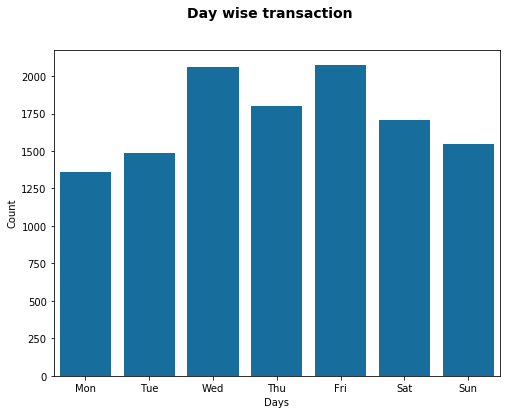

In [43]:
# Bar graph for the no. of transaction occured on particular days
plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]

sb.countplot(data=df_clean, x='weekday', color=base_color);
plt.xlabel('Days');
plt.ylabel('Count');
plt.suptitle('Day wise transaction', fontsize=14, fontweight='semibold');

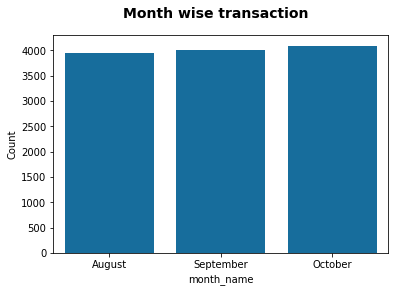

In [80]:
# Bar graph for the no. of transaction occured on particular months
plt.rcParams['figure.figsize'] = 6, 4
base_color = sb.color_palette('colorblind')[0]

sb.countplot(data=df_clean, x='month_name', color=base_color);
plt.xlabel('month_name');
plt.ylabel('Count');
plt.suptitle('Month wise transaction', fontsize=14, fontweight='semibold');

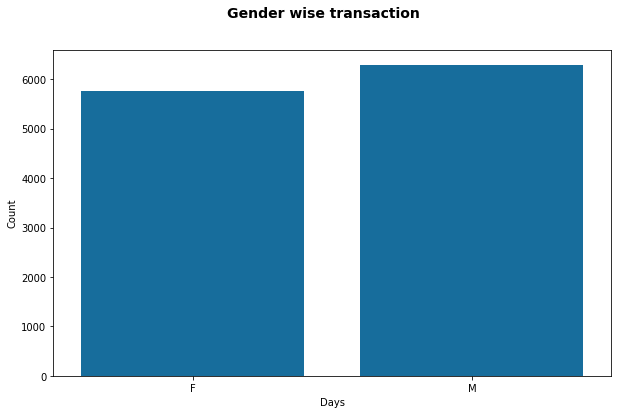

In [83]:
# Bar graph for the no. of transaction occured as per gender
plt.rcParams['figure.figsize'] = 10, 6
base_color = sb.color_palette('colorblind')[0]

sb.countplot(data=df_clean, x='gender', color=base_color);
plt.xlabel('Days');
plt.ylabel('Count');
plt.suptitle('Gender wise transaction', fontsize=14, fontweight='semibold');

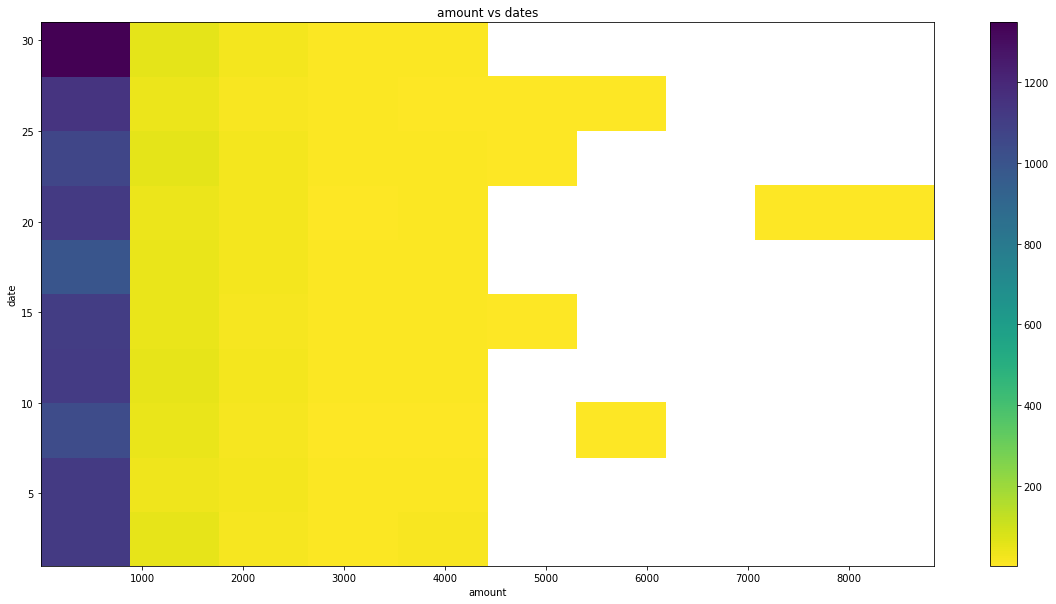

In [86]:
# from the below graph we can see that there some ouliers present in amount which can bend avg. value.
plt.rcParams['figure.figsize'] = 20, 10
plt.hist2d(data=df_clean,x='amount',y='date_of_trans',cmin=0.5,cmap='viridis_r');
plt.colorbar();
plt.xlabel('amount');
plt.ylabel('date');
plt.title('amount vs dates');